In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

In [3]:
file = "img/monarch.pgm" #Endereço da imagem


<h3>Floyd Steinberg</h3><br>
<hr>

In [4]:
#Dithering de Floyd Steinberg
def floyd_steinberg(original,thresh=127,zig_zag=False):
    img = original
    cycle = 1
    c = 1
    if zig_zag:
        cycle = -1
    
    for y in range(img.shape[0]-1):
        for x in chain(range(0, img.shape[1]-1, 1), range(img.shape[1]-2, -1, cycle)): #Controla o zig zague ou linear
            if(img[y][x] > thresh):
                dithering = 255
                err = img[y][x] - 255
            else:
                dithering = 0
                err = img[y][x] - 0
                
            img[y][x] = dithering
            
            img[y][x+c] = img[y][x+c] + err*(7/16)
            img[y+c][x-c] = img[y+c][x-c] + err*(3/16)
            img[y+c][x] = img[y+c][x] + err*(5/16)
            img[y+c][x+c] = img[y+c][x+c] + err*(1/16)
        c *= cycle    #Inverte a direção caso zig zague
            
            
    return img

<h3>Padrões para pontilhado ordenado</h3><br>
<hr>

In [5]:
#Padrões para dithering
d = {0:[[0,0,0],
        [0,0,0],
        [0,0,0]],
     
     1:[[0,255,0],
        [0,0,0],
        [0,0,0]],
     
     2:[[0,255,0],
        [0,0,0],
        [0,0,255]],
     
     3:[[255,255,0],
        [0,0,0],
        [0,0,255]],
     
     4:[[255,255,0],
        [0,0,0],
        [255,0,255]],
     
     5:[[255,255,255],
        [0,0,0],
        [255,0,255]],
     
     6:[[255,255,255],
        [0,0,255],
        [255,0,255]],
     
     7:[[255,255,255],
        [0,0,255],
        [255,255,255]],
     
     8:[[255,255,255],
        [255,0,255],
        [255,255,255]],
     
     9:[[255,255,255],
        [255,255,255],
        [255,255,255]],
     }

<h3>Pontilhado Ordenado</h3><br>
<hr>

In [6]:

def ordenado(img):
    new_img = np.zeros([img.shape[0]*3,img.shape[1]*3])
    m = 1
    n = 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            cols = np.array([[m-1, m, m+1],
                             [m-1, m, m+1],
                             [m-1, m, m+1]],
                            dtype=np.intp)
            rows = np.array([[n-1, n-1, n-1],
                             [n, n, n],
                             [n+1, n+1, n+1]],
                             dtype=np.intp)
            
            new_img[cols,rows] = d[round(np.interp(img[i][j],[0,255],[0,9]))]
            n = (n+3)%(new_img.shape[1])
        m = (m+3)%(new_img.shape[0])
    return new_img

In [7]:
image = cv2.imread(file,0)
img = ordenado(image)
cv2.imwrite("dithering2.png",img)

True

<h3>Visualização Pontilahdo Ordenado</h3><br>
<hr>

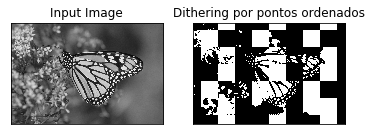

In [8]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(image,cmap="gray")

a = fig.add_subplot(1, 2, 2)
plt.title('Dithering por pontos ordenados'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(img,cmap="gray")
plt.show()

In [13]:
image = cv2.imread(file,0)
img = floyd_steinberg(image,zig_zag=False)
cv2.imwrite("floyd2.png",img)

True

<h3>Visualização Floyd Steinberg</h3><br>
<H4>Linear</h4>
<hr>

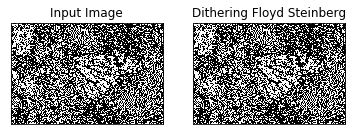

In [14]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(image,cmap="gray")

a = fig.add_subplot(1, 2, 2)
plt.title('Dithering Floyd Steinberg'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(img,cmap="gray")
plt.show()

In [15]:
image = cv2.imread(file,0)
img = floyd_steinberg(image,zig_zag=True)
cv2.imwrite("floyd_flip2.png",img)

True

<h3>Visualização Floyd Steinberg</h3><br>
<H4>Zig Zague</h4>
<hr>

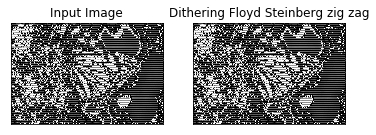

In [17]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(image,cmap="gray")

a = fig.add_subplot(1, 2, 2)
plt.title('Dithering Floyd Steinberg zig zag'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(img,cmap="gray")
plt.show()